<a href="https://colab.research.google.com/github/LoganCones/TuriCreate/blob/main/Washington_Week_6_TuriCreate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Python Notebook will need to be performed in a Google Colab Notebook or minor adjustments will need to be made
!pip install turicreate

In [6]:
#Really Don't like the process of getting SFrame's read in but it's cool when it's working
import turicreate as tc
from google.colab import files
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#Prompted to upload a file to Goolge Colab
uploaded = files.upload()

Saving image_test_data.zip to image_test_data.zip


In [15]:
!unzip image_train_data.zip
!unzip image_test_data.zip
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

Archive:  image_train_data.zip
replace image_train_data/m_504edbda459b24ff.sidx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: image_train_data/m_504edbda459b24ff.sidx  
  inflating: __MACOSX/image_train_data/._m_504edbda459b24ff.sidx  
  inflating: image_train_data/m_504edbda459b24ff.frame_idx  
  inflating: __MACOSX/image_train_data/._m_504edbda459b24ff.frame_idx  
  inflating: image_train_data/dir_archive.ini  
  inflating: __MACOSX/image_train_data/._dir_archive.ini  
 extracting: image_train_data/objects.bin  
  inflating: __MACOSX/image_train_data/._objects.bin  
  inflating: image_train_data/m_504edbda459b24ff.0000  
  inflating: __MACOSX/image_train_data/._m_504edbda459b24ff.0000  
  inflating: __MACOSX/._image_train_data  
Archive:  image_test_data.zip
replace image_test_data/m_e16f5ffd2c088370.sidx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: image_test_data/m_e16f5ffd2c088370.sidx  
  inflating: __MACOSX/image_test_data/._m_e16f5ffd2c088370.sidx  
  inflating

In [17]:
#Train a Classifier on the Raw Image Pixels
raw_pixel_model = tc.logistic_classifier.create(image_train, target = 'label',
                                         features =['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.032918  | 1.506731     | 0.345588          | 0.297030            |

| 1         | 10       | 2.798015  | 2.163099     | 0.418592          | 0.386139            |

| 2         | 11       | 2.798015  | 2.430036     | 0.439601          | 0.415842            |

| 3         | 13       | 1.805167  | 2.793222     | 0.493697          | 0.495050            |

| 4         | 14       | 1.805167  | 3.054014     | 0.430672          | 0.376238            |

| 9         | 22       | 0.731326  | 4.661746     | 0.517857          | 0.544554            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [22]:
#Make a Prediction with the simple model based on raw pixels
image_test[0:3]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."


In [23]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [25]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.47225, 'auc': 0.72051625, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  111  |
 |     bird     |       dog       |  210  |
 |     dog      |       cat       |  236  |
 |     dog      |       bird      |  218  |
 |     cat      |    automobile   |  175  |
 |     cat      |       cat       |  331  |
 |     dog      |       dog       |  435  |
 |     cat      |       dog       |  310  |
 |     bird     |       cat       |  163  |
 |  automobile  |    automobile   |  637  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.46966517303664035, 'log_loss': 1.2141342225598846, 'precision': 0.468479

In [26]:
#Can we improve the model using deep features
len(image_train)
#Small dataset so we do some transfer learning    

2005

In [29]:
deep_learning_model = tc.logistic_classifier.create(image_train, 
                                                    features = ['deep_features'],
                                                    target = 'label')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.563572     | 0.762080          | 0.673267            |

| 1         | 6        | 0.250000  | 1.329955     | 0.769433          | 0.712871            |

| 2         | 8        | 0.230485  | 1.910015     | 0.777311          | 0.702970            |

| 3         | 12       | 0.691456  | 2.841714     | 0.786239          | 0.732673            |

| 4         | 14       | 0.854428  | 3.434105     | 0.813550          | 0.742574            |

| 9         | 21       | 1.000000  | 5.892087     | 0.929097          | 0.782178            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [30]:
#Apply the deep features model to the first few images of test set
image_test[0:3]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."


In [31]:
deep_learning_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [33]:
#Compute test_data accuracy of deep_features model
deep_learning_model.evaluate(image_test)

{'accuracy': 0.78825, 'auc': 0.938036083333333, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       cat       |  230  |
 |     bird     |       bird      |  779  |
 |  automobile  |       bird      |   14  |
 |  automobile  |    automobile   |  958  |
 |     bird     |    automobile   |   19  |
 |     cat      |       cat       |  707  |
 |     bird     |       cat       |  141  |
 |     cat      |       dog       |  207  |
 |     dog      |       dog       |  709  |
 |     dog      |    automobile   |   12  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7896088676719194, 'log_loss': 0.6447246959910382, 'precision': 0.

In [103]:
#Deep Features for Image Retreival with Nearest-Neighbors model 
knn_model = tc.nearest_neighbor_classifier.create(image_train,
                                                  features = ['deep_features'], target = 'label')


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [104]:
knn_model.evaluate(dog_test, max_neighbors=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 1002000 | 49.9751     | 2.29s        |

| Done         | 2005000 | 100         | 2.33s        |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 1003000 | 50.0249     | 2.29s        |

| Done         | 2005000 | 100         | 2.31s        |

+--------------+---------+-------------+--------------+

{'accuracy': 0.678, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       dog       |  678  |
 |     dog      |    automobile   |   5   |
 |     dog      |       cat       |  248  |
 |     dog      |       bird      |   69  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns]}

In [44]:
test = image_train[8:9]

In [50]:
knn_model.query(test)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.746ms     |

| Done         |         | 100         | 279.515ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,8,0.0,1
0,372,32.31082225336061,2
0,1757,33.925377945373526,3
0,1343,35.02313415362676,4
0,1009,35.37682354971551,5


In [51]:
image_train[image_train['reference_label'] == 372]

RuntimeError: ignored

In [54]:
sketch = tc.Sketch(image_train['label'])
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [99]:
knn_cat = tc.nearest_neighbors.create(cat,
                                      features= ['deep_features'])

dog = image_train[image_train['label'] == 'dog']
cat = image_train[image_train['label'] == 'cat']
auto = image_train[image_train['label'] == 'automobile']
bird = image_train[image_train['label'] == 'bird']

knn_dog = tc.nearest_neighbors.create(dog, features = ['deep_features'])
knn_cat = tc.nearest_neighbors.create(cat,
                                      features= ['deep_features'])
knn_auto = tc.nearest_neighbors.create(auto,
                                      features= ['deep_features'])
knn_bird = tc.nearest_neighbors.create(bird,
                                      features= ['deep_features'])


cat_test = image_test[image_test['label'] == 'cat']
auto_test = image_test[image_test['label'] == 'automobile']
dog_test = image_test[image_test['label'] == 'dog']
bird_test = image_test[image_test['label'] == 'bird']

cat_test['distances'] = knn_dog.query(cat_test, k = 1)
auto_test['distances'] = knn_dog.query(auto_test, k = 1)
dog_test['distances'] = knn_dog.query(dog_test, k = 1)
bird_test['distances'] = knn_dog.query(bird_test, k = 1)



Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 745.814ms    |

| Done         | 509000  | 100         | 756.87ms     |

+--------------+---------+-------------+--------------+

TypeError: ignored

In [ ]:
knn_cat.query(image_test[)])


In [88]:
print(knn_cat.query(image_test[0:1]))
print(knn_dog.query(image_test[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 17.75ms      |

| Done         |         | 100         | 79.755ms     |

+--------------+---------+-------------+--------------+

+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |       181       | 34.62371920804245  |  1   |
|      0      |       467       | 36.00687992842462  |  2   |
|      0      |       323       | 36.52008134363789  |  3   |
|      0      |       269       | 36.754850252057054 |  4   |
|      0      |        3        | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 18.154ms     |

| Done         |         | 100         | 95.065ms     |

+--------------+---------+-------------+--------------+

+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |       159       | 37.464262878423774 |  1   |
|      0      |       129       | 37.56668321685285  |  2   |
|      0      |       362       | 37.60472670789396  |  3   |
|      0      |       445       | 37.70655851529755  |  4   |
|      0      |        67       | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]



In [101]:
knn_model.evaluate(dog_test, k = 1)

AttributeError: ignored

In [94]:
answer = cat[181:182]
answer_dog = dog[159:160]

,SArray
0,

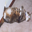

,SArray
0,

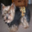

In [95]:
answer['image'].explore()
answer_dog['image'].explore()

In [69]:
knn_class = tc.nearest_neighbor_classifier.create(image_train, features = ['deep_features'], target = 'label')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [70]:
knn_class.predict(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 17.584ms     |

| Done         |         | 100         | 261.861ms    |

+--------------+---------+-------------+--------------+

dtype: str
Rows: 1
['cat']